# In this assignment, the goal is to predict income variables  based on other relevant variables from the data set

## STEP 1 Data Loading and preprocessing --cleansing--

In [1]:
# imports
import pandas as pd

nhies = pd.read_csv('NHIESHH2016.csv')

#Get the summary of the total income  variable
#we can find the summary of the income variable by using .describe()
#summary_inc = nhies["income"].describe()
#summary_inc

/home/jupyterlab/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,7,8,9,12,13,14,15,16,21,25,32,33,34,35,37,41,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,68,69,70,76,86,87,89,91,92,93,94,95,96,97,98,99,100,101,102,137,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,252,300,311,314,316,317,319,320,322,323,326,329,332,335,338,341,343,344,347,350,353,356,359,362,364,365,368,371,373,374,377,380,383,386,389,391,392,394,395,397,398,401,403,404,406,407,409,410,413,415,416,419,422,423,424,425,426,429,554,636,749,750,863,912,923,958,975,992,1066,1223,1257,1283,1285,1315,1316,1317,1318,1319,1320,1331,1332,1333,1334,1335,1336,1390,1428,1445,1446,1487,1488,1489,1530,1570,1572,1590,1610,1646,1647,1670,1671,1679,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2404,2405,240

In [3]:
nhies.shape

(10090, 2485)

In [21]:
nhies.head()

,region,constituency,psu,segment,du,hh,ah_supervisor,ah_interviewer,ah_sample_status,ah_status,...,other,urbrur,reg_urb,wgt_ind,main_language,main_sourceincome,tenure,urbrur_head,attain,food_coping
0,1,1,2,B,3,2,901002,501004,1,2,...,2532.0,99,2,41.045116,5,1,3,4,3,
1,1,1,2,B,12,1,901002,501004,1,2,...,1354.0,99,2,37.172646,10,5,4,4,3,5
2,1,1,2,B,17,1,901002,501004,1,2,...,16904.0,99,2,30.331425,5,1,1,3,2,
3,1,1,2,B,23,1,901002,501004,1,2,...,714.0,99,2,47.161358,5,5,1,4,3,
4,1,1,2,B,29,1,901002,501004,1,2,...,4934.0,99,2,71.750534,12,1,3,3,3,


# The income related variables are apci,ncons_exp,g01_food,income,cons_exp,apci_groups

In [2]:
# Extract relevant variables 
nhiesinc = nhies[['sex_of_head','age_of_head','reg_urb','main_language','main_sourceincome',\
                  'tenure','urbrur_head','attain','apci','ncons_exp','g01_food','income','cons_exp','apci_groups']]


In [3]:
nhiesinc.shape

(10090, 14)

In [4]:
nhiesinc.head(10)

,sex_of_head,age_of_head,reg_urb,main_language,main_sourceincome,tenure,urbrur_head,attain,apci,ncons_exp,g01_food,income,cons_exp,apci_groups
0,2,35,2,5,1,3,4,3,23453.849609,1800.0,6681.848633,23453.849609,21653.849609,3
1,2,25,2,10,5,4,4,3,29355.007812,1800.0,10505.010742,29355.007812,27555.007812,3
2,1,51,2,5,1,1,3,2,91796.781250,2500.0,35028.773438,91796.781250,89296.773438,5
3,2,54,2,5,5,1,4,3,16954.039062,0.0,1756.040039,16954.039062,16954.039062,3
4,1,35,2,12,1,3,3,3,24646.001953,960.0,9542.000000,49292.003906,48332.000000,3
5,1,45,2,8,1,1,3,3,17227.201172,200.0,37928.800781,68908.804688,68708.804688,3
6,2,69,2,5,2,1,4,2,14457.667969,4020.0,11055.001953,43373.003906,39353.003906,2
7,2,39,2,5,1,3,4,3,117404.437500,69800.0,15178.432617,117404.437500,47604.433594,5
8,2,32,2,5,1,3,4,3,5591.412109,2800.0,888.824219,11182.824219,8382.824219,1
9,2,52,2,5,1,1,4,2,12650.011719,50.0,10078.029297,31625.027344,31575.027344,2


In [5]:
nhiesinc.dtypes

sex_of_head            int64
age_of_head            int64
reg_urb                int64
main_language          int64
main_sourceincome      int64
tenure                 int64
urbrur_head            int64
attain                object
apci                 float64
ncons_exp            float64
g01_food             float64
income               float64
cons_exp             float64
apci_groups            int64
dtype: object

In [6]:
# attain is object; let's see why
print(nhiesinc['attain'].value_counts())

3    4085
2    2645
1    1823
4     938
      289
3      85
1      82
2      80
5      54
4       8
5       1
Name: attain, dtype: int64


In [7]:
# attain contains null values--bllanks-- ; let's convert to numeric and replace with code '6'
nhiesinc.attain = nhiesinc[['attain']].convert_objects(convert_numeric=True).fillna(6)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
# Checking again the data types ; things ok now.
nhiesinc.dtypes

sex_of_head            int64
age_of_head            int64
reg_urb                int64
main_language          int64
main_sourceincome      int64
tenure                 int64
urbrur_head            int64
attain               float64
apci                 float64
ncons_exp            float64
g01_food             float64
income               float64
cons_exp             float64
apci_groups            int64
dtype: object

In [10]:
nhiesinc.isnull().any()

sex_of_head          False
age_of_head          False
reg_urb              False
main_language        False
main_sourceincome    False
tenure               False
urbrur_head          False
attain               False
apci                 False
ncons_exp            False
g01_food             False
income               False
cons_exp             False
apci_groups          False
dtype: bool

In [11]:
# No null values now
# Check age of head of household
summary_age = nhiesinc["age_of_head"].describe()
summary_age

count    10090.000000
mean        46.619623
std         17.119834
min         12.000000
25%         33.000000
50%         44.000000
75%         58.000000
max        107.000000
Name: age_of_head, dtype: float64

In [12]:
# split/recode age into age_groups
age_map = {
    '1': (12, 24),
    '2': (25, 34), 
    '3': (35, 44), 
    '4': (45, 54),
    '5': (55, 64),
    '6': (65, 107)
}

In [13]:
for (k, v) in age_map.items():
    nhiesinc.loc[(nhiesinc['age_of_head'] >= v[0]) & (nhiesinc['age_of_head'] <= v[1]), 'age_group'] = k

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
# move new age_group col to begin of matrix
cols = list(nhiesinc)
cols.insert(1, cols.pop(cols.index('age_group')))
nhiesinc = nhiesinc[cols]
nhiesinc.head()

,sex_of_head,age_group,age_of_head,reg_urb,main_language,main_sourceincome,tenure,urbrur_head,attain,apci,ncons_exp,g01_food,income,cons_exp,apci_groups
0,2,3,35,2,5,1,3,4,3.0,23453.849609,1800.0,6681.848633,23453.849609,21653.849609,3
1,2,2,25,2,10,5,4,4,3.0,29355.007812,1800.0,10505.010742,29355.007812,27555.007812,3
2,1,4,51,2,5,1,1,3,2.0,91796.781250,2500.0,35028.773438,91796.781250,89296.773438,5
3,2,4,54,2,5,5,1,4,3.0,16954.039062,0.0,1756.040039,16954.039062,16954.039062,3
4,1,3,35,2,12,1,3,3,3.0,24646.001953,960.0,9542.000000,49292.003906,48332.000000,3


In [15]:
nhiesinc.to_csv('nhiesincml.csv')

# STEP 2 Exploratory Data Analysis

In [16]:
# imports
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Exploring quantitative variables
quantds = nhiesinc[['age_of_head','apci','ncons_exp','g01_food','income','cons_exp',]]

In [19]:
# describe variables
quantds.describe()

,age_of_head,apci,ncons_exp,g01_food,income,cons_exp
count,10090.000000,1.009000e+04,1.009000e+04,1.009000e+04,1.009000e+04,1.009000e+04
mean,46.619623,5.258010e+04,3.019206e+04,4.071043e+04,1.314056e+05,1.064489e+05
std,17.119834,2.983869e+05,5.262571e+05,1.398639e+05,6.042626e+05,2.183151e+05
min,12.000000,6.701428e+02,0.000000e+00,1.040000e+02,2.545800e+03,1.935800e+03
25%,33.000000,1.020551e+04,0.000000e+00,1.156173e+04,3.137361e+04,2.998430e+04
50%,44.000000,2.029448e+04,9.800000e+02,2.212719e+04,5.881513e+04,5.515310e+04
75%,58.000000,4.484669e+04,7.700000e+03,4.121035e+04,1.177895e+05,1.080720e+05
max,107.000000,2.478775e+07,4.568200e+07,6.653724e+06,4.957551e+07,7.167566e+06


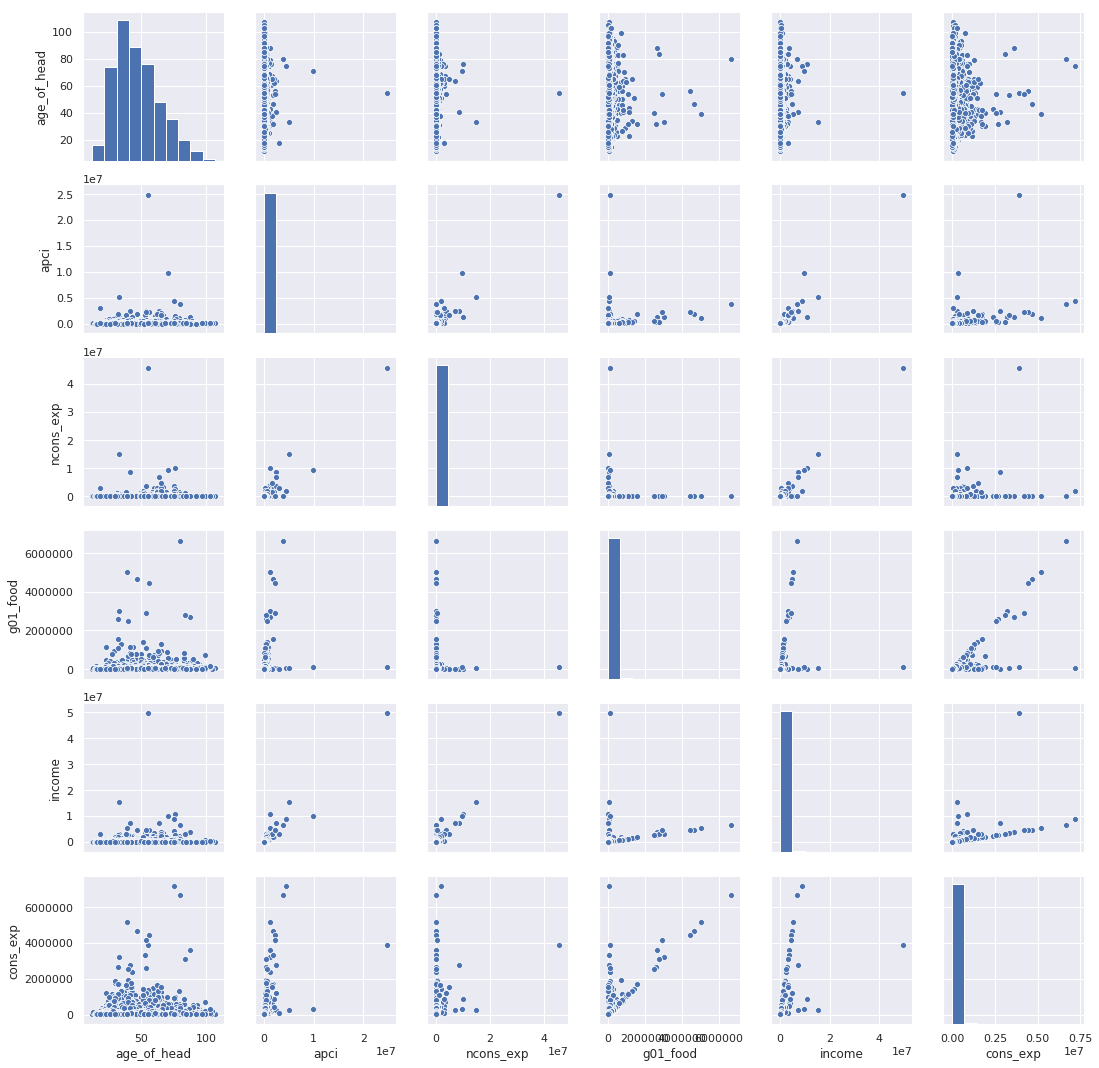

In [40]:
sns.pairplot(quantds,height=2.5)

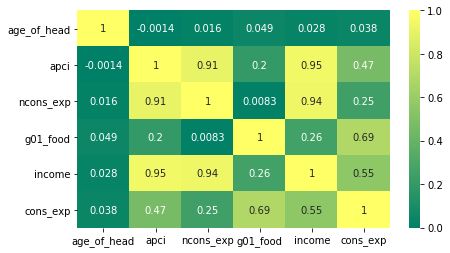

In [20]:
# Heat Map

plt.figure(figsize=(7,4))
sns.heatmap(quantds.corr(),annot=True,cmap='summer')

#### Consumption expenditure (cons_exp) is correlated with income and food expenditur (g01_food).
#### Income correlates with apci, non consumption expenditure (ncons_exp), and consumption expenditure
#### apci (adjusted per capita income) of the household correlates strongly with ncons_exp and income
#### Age of head of household is not correlated with the other variables
#### Hence in this study we will limit ourselves to predicting the variable apci_groups (our label or dependent variable --categorical) using 
#### the independent variables (categorical) like age_group, sex_of_head, main_language, main_sourceincome, tenure, urbrur_head, attain

##### We now look at apci (quantitative variable) by the independent categorical variables using the groupby command

In [22]:
pd.pivot_table(nhiesinc,index=["apci_groups"],values=["apci"],aggfunc=np.mean)

,apci
apci_groups,
1,5248.946156
2,11777.542903
3,23489.705852
4,49786.879040
5,97112.119328
6,168159.722998
7,666935.851615


#### As can be seen apci is highly correlated with apci_groups (adjusted per capita income percentiles); the higher percentile groups have higher income on average

In [23]:
pd.pivot_table(nhiesinc,index=["attain"],values=["apci"],aggfunc=np.mean)

,apci
attain,
1.0,21037.777713
2.0,25560.796783
3.0,53270.796768
4.0,178079.126510
5.0,21394.312029
6.0,100430.021163


In [24]:
pd.pivot_table(nhiesinc,index=["urbrur_head"],values=["apci"],aggfunc=np.mean)

,apci
urbrur_head,
1,58583.120387
2,90313.645754
3,27091.464974
4,38538.806782


In [25]:
pd.pivot_table(nhiesinc,index=["main_sourceincome"],values=["apci"],aggfunc=np.mean)

,apci
main_sourceincome,
1,59732.768379
2,30908.246532
3,25933.743401
4,82595.366270
5,37182.290785
6,18848.665612
7,350176.750430
8,94228.558181


In [26]:
pd.pivot_table(nhiesinc,index=["main_language"],values=["apci"],aggfunc=np.mean)

,apci
main_language,
1,13081.737005
2,26550.894939
3,39007.079170
4,24511.539557
5,33677.527810
6,40557.060732
7,38363.680920
8,155470.642012
9,458050.187500


In [27]:
pd.pivot_table(nhiesinc,index=["reg_urb"],values=["apci"],aggfunc=np.mean)

,apci
reg_urb,
1,62170.994003
2,63856.652641
3,134567.735510
4,42711.336423
5,64280.529345
6,70427.359349
7,34526.328959
8,17170.801369
9,29263.190523


In [28]:
pd.pivot_table(nhiesinc,index=["age_group"],values=["apci"],aggfunc=np.mean)

,apci
age_group,
1,48700.969534
2,55807.573745
3,46346.547929
4,49606.727925
5,71980.282448
6,46574.443470


In [29]:
pd.pivot_table(nhiesinc,index=["sex_of_head"],values=["apci"],aggfunc=np.mean)

,apci
sex_of_head,
1,40988.454159
2,62354.854376


#### Looking at the categorical variables 

In [30]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


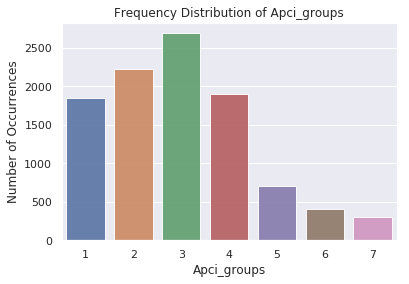

In [32]:
# apci_groups barchart
cnt = nhiesinc['apci_groups'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of Apci_groups')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Apci_groups', fontsize=12)
plt.show()

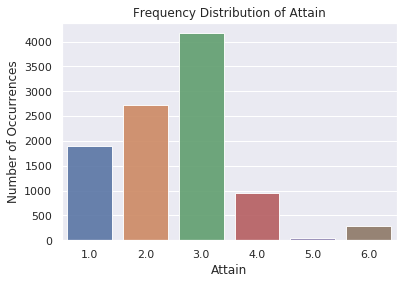

In [33]:
# attain_groups barchart
cnt = nhiesinc['attain'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of Attain')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Attain', fontsize=12)
plt.show()

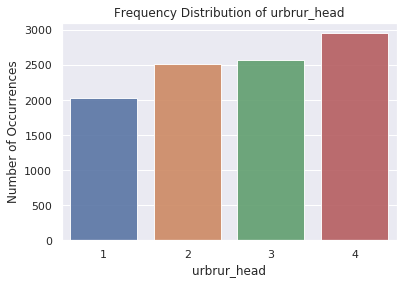

In [34]:
# urbrur_head barchart
cnt = nhiesinc['urbrur_head'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of urbrur_head')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('urbrur_head', fontsize=12)
plt.show()

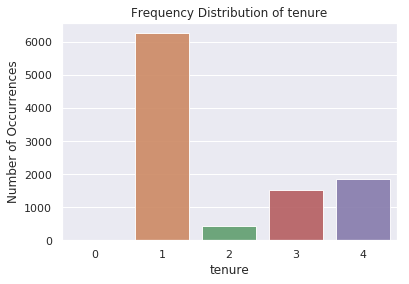

In [35]:
# tenure barchart
cnt = nhiesinc['tenure'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of tenure')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('tenure', fontsize=12)
plt.show()

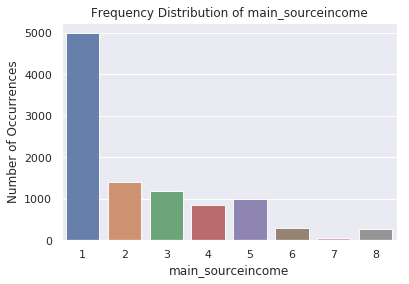

In [36]:
# main_sourceincome barchart
cnt = nhiesinc['main_sourceincome'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of main_sourceincome')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('main_sourceincome', fontsize=12)
plt.show()

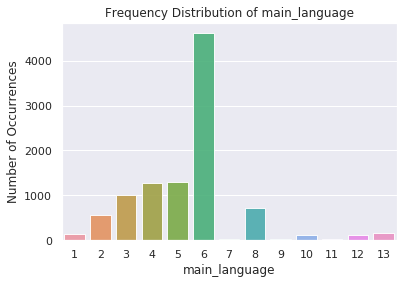

In [37]:
# main_language barchart
cnt = nhiesinc['main_language'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of main_language')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('main_language', fontsize=12)
plt.show()

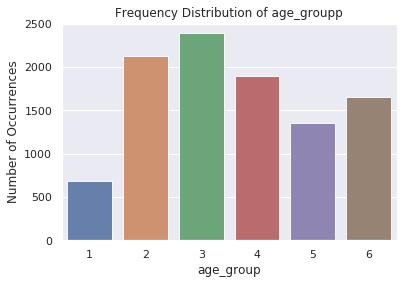

In [38]:
# age_group barchart
cnt = nhiesinc['age_group'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of age_groupp')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('age_group', fontsize=12)
plt.show()

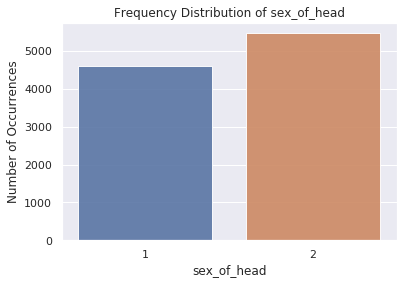

In [39]:
# sex_of_head barchart
cnt = nhiesinc['sex_of_head'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=0.9)
plt.title('Frequency Distribution of sex_of_head')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sex_of_head', fontsize=12)
plt.show()

#### We have now extracted the data and done exploratory analysis for the label and some feature variables.
#### In the next Notebook Ads_Capstone.feature_selection2.Python3.ipynb we will select the final features to be included in our future models.